In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(["Ohio", "Colorado"], name="state"),
                    columns=pd.Index(["one", "two", "three"],
                    name="number"))

In [4]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [5]:
result = data.stack()

In [6]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [7]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [8]:
result.unstack(level=0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [9]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [10]:
s1 = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"], dtype="Int64")
s2 = pd.Series([4, 5, 6], index=["c", "d", "e"], dtype="Int64")
data2 = pd.concat([s1, s2], keys=["one", "two"])

In [11]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [12]:
data2.T

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [13]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,<NA>
two,<NA>,<NA>,4,5,6


In [14]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [15]:
data2.unstack().stack(dropna=False)

C:\Users\11321\AppData\Local\Temp\ipykernel_21564\3936770077.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data2.unstack().stack(dropna=False)


one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [16]:
data2.unstack().stack(future_stack=True)

one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [17]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns=pd.Index(["left", "right"], name="side"))

In [18]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [19]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [20]:
df.unstack(level="state").stack(level="side",future_stack=True)

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

In [21]:
df.unstack(level="state").stack(level="side",future_stack=True)

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

In [22]:
data = pd.read_csv("book_data/macrodata.csv")

In [23]:
data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]

In [24]:
data.head()

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2


In [25]:
periods = pd.PeriodIndex(year = data.pop("year"),
                         quarter = data.pop("quarter"),
                         name = "date")

C:\Users\11321\AppData\Local\Temp\ipykernel_21564\984926615.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  periods = pd.PeriodIndex(year = data.pop("year"),


In [26]:
#periods = pd.PeriodIndex.from_fields(
#    fields=[data.pop("year"), data.pop("quarter")],
#    names=["year", "quarter"],
#    name="date"
#)

In [27]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [28]:
data.index = periods.to_timestamp("D")

In [29]:
data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [30]:
data = data.reindex(columns=["realgdp", "infl", "unemp"])

In [31]:
data.columns.name = "item"

In [32]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [33]:
long_data = (data.stack()
             .reset_index()
             .rename(columns={0: "value"}))

In [34]:
long_data[:10]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
5,1959-04-01,unemp,5.100
6,1959-07-01,realgdp,2775.488
7,1959-07-01,infl,2.740
8,1959-07-01,unemp,5.300
9,1959-10-01,realgdp,2785.204


In [35]:
pivoted = long_data.pivot(index="date", columns="item", values="value")

In [36]:
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [37]:
long_data["value2"] = np.random.standard_normal(len(long_data))

In [38]:
long_data[:10]

,date,item,value,value2
0,1959-01-01,realgdp,2710.349,0.411854
1,1959-01-01,infl,0.000,1.290947
2,1959-01-01,unemp,5.800,0.971575
3,1959-04-01,realgdp,2778.801,2.732780
4,1959-04-01,infl,2.340,-1.044231
5,1959-04-01,unemp,5.100,0.371397
6,1959-07-01,realgdp,2775.488,0.347817
7,1959-07-01,infl,2.740,0.302411
8,1959-07-01,unemp,5.300,0.285092
9,1959-10-01,realgdp,2785.204,-0.666916


In [39]:
pivoted = long_data.pivot(index="date", columns="item")

In [40]:
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.290947  0.411854  0.971575
1959-04-01  2.34  2778.801   5.1 -1.044231  2.732780  0.371397
1959-07-01  2.74  2775.488   5.3  0.302411  0.347817  0.285092
1959-10-01  0.27  2785.204   5.6  1.784156 -0.666916 -0.779988
1960-01-01  2.31  2847.699   5.2 -1.239400  2.219229 -0.882884

In [41]:
pivoted["value"].head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [42]:
unstacked = long_data.set_index(["date", "item"]).unstack(level="item")

In [68]:
long_data.unstack(level="item")

KeyError: 'Requested level (item) does not match index name (None)'

In [67]:
unstacked

,item,value,value2
date,,,
1959-01-01,realgdp,2710.349,0.411854
1959-01-01,infl,0.000,1.290947
1959-01-01,unemp,5.800,0.971575
1959-04-01,realgdp,2778.801,2.732780
1959-04-01,infl,2.340,-1.044231
...,...,...,...
2009-04-01,infl,3.370,1.826443
2009-04-01,unemp,9.200,1.114294
2009-07-01,realgdp,12990.341,-0.326848


In [43]:
unstacked.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.290947  0.411854  0.971575
1959-04-01  2.34  2778.801   5.1 -1.044231  2.732780  0.371397
1959-07-01  2.74  2775.488   5.3  0.302411  0.347817  0.285092
1959-10-01  0.27  2785.204   5.6  1.784156 -0.666916 -0.779988
1960-01-01  2.31  2847.699   5.2 -1.239400  2.219229 -0.882884

In [44]:
df = pd.DataFrame({"key": ["foo", "bar", "baz"],
                   "A": [1, 2, 3],
                   "B": [4, 5, 6],
                   "C": [7, 8, 9]})

In [45]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [46]:
melted = pd.melt(df, id_vars="key")

In [47]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [48]:
reshaped = melted.pivot(index="key", columns="variable", values="value")

In [49]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [50]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [51]:
pd.melt(df, id_vars="key", value_vars=["A", "B"])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [52]:
pd.melt(df, value_vars=["A", "B", "C"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [53]:
pd.melt(df, value_vars=["key", "A", "B"])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


In [54]:
import matplotlib.pyplot as plt

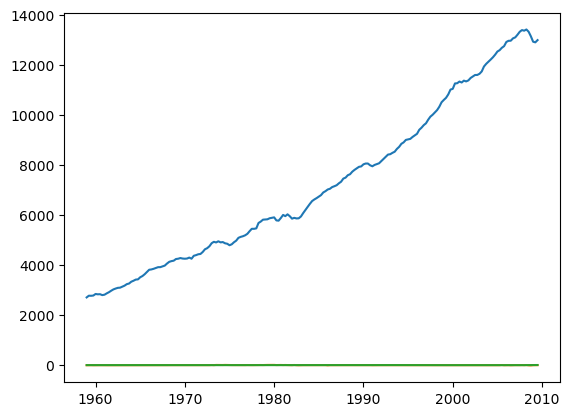

In [55]:
plt.plot(data)

In [56]:
data = np.arange(10)

In [57]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

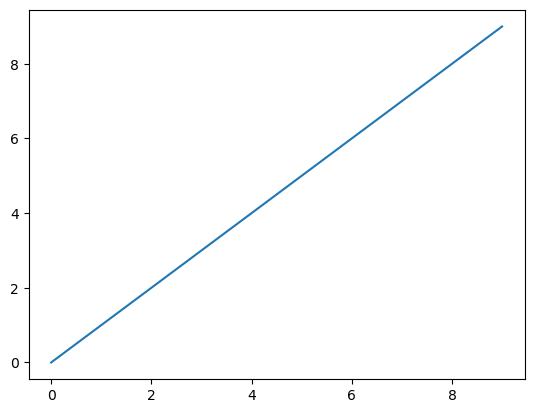

In [58]:
plt.plot(data)